# Preprocess the data

In [ ]:
#Data Preprocessing
!pip install ipywidgets

import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

import ipywidgets as widgets
from IPython.display import display

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from textblob import TextBlob

#Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

#Model
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Load the dataset
df = pd.read_csv("amazon.csv")
pd.set_option('display.max_colwidth', 60)
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Charging and ...,Computers&Accessories|Accessories&Peripherals|Cables&Acc...,₹399,"₹1,099",64%,4.2,"24,269","High Compatibility : Compatible With iPhone 12, 11, X/Xs...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONIL...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0O...","Satisfied,Charging is really fast,Value for money,Produc...","Looks durable Charging is fine tooNo complains,Charging ...",https://m.media-amazon.com/images/W/WEBP_402378-T1/image...,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Char...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided ...,Computers&Accessories|Accessories&Peripherals|Cables&Acc...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be it an and...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525A...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,Bh...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RYGGS0M09S3K...","A Good Braided Cable for Your Type C Device,Good quality...",I ordered this cable to connect my phone to Android Auto...,https://m.media-amazon.com/images/W/WEBP_402378-T2/image...,https://www.amazon.in/Ambrane-Unbreakable-Charging-Braid...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync USB Cable C...,Computers&Accessories|Accessories&Peripherals|Cables&Acc...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safety proctect...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQLWQOWZ4N3O...","Kunal,Himanshu,viswanath,sai niharka,saqib malik,Aashiq,...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R25X4TBMPY91...","Good speed for earlier versions,Good Product,Working goo...","Not quite durable and sturdy,https://m.media-amazon.com/...",https://m.media-amazon.com/images/W/WEBP_402378-T1/image...,https://www.amazon.in/Sounce-iPhone-Charging-Compatible-...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resi...,Computers&Accessories|Accessories&Peripherals|Cables&Acc...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compatible with s...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5SGCUQBP7YSC...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh chouhan,Ra...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1CLH2ULIVG5...","Good product,Good one,Nice,Really nice product,Very firs...","Good product,long wire,Charges good,Nice,I bought this c...",https://m.media-amazon.com/images/I/41V5FtEWPkL._SX300_S...,https://www.amazon.in/Deuce-300-Resistant-Tangle-Free-Tr...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cab...,Computers&Accessories|Accessories&Peripherals|Cables&Acc...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes with charging...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZHM4QB2KPKFU...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK,Bhargav,D...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R3KK4GT934S...","As good as original,Decent,Good one for secondary use,Be...","Bought this instead of original apple, does the work for...",https://m.media-amazon.com/images/W/WEBP_402378-T2/image...,https://www.amazon.in/Portronics-Konnect-POR-1080-Chargi...


In [ ]:
df.shape

(1465, 16)

In [ ]:
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [ ]:
df.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,object
actual_price,object
discount_percentage,object
rating,object
rating_count,object
about_product,object
user_id,object


#### Feature Description

In [ ]:
data = {
    'Feature Name': ['product_id', 'product_name', 'category', 'discounted_price', 'actual_price',
                     'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id',
                     'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link'],
    'Data Type': ['object'] * 16,
    'Description': [
        'Unique identifier for each product',
        'Name of the product',
        'Category to which the product belongs',
        'Discounted price of the product',
        'Original price of the product before discounts',
        'Percentage of the discount provided on the product',
        'Average rating given to the product by users',
        'Number of users who have rated the product',
        'Description or details about the product',
        'Unique identifier for the user who wrote the review',
        'Name of the user who wrote the review',
        'Unique identifier for each user review',
        'Short title or summary of the user review',
        'Full content of the user review',
        'URL link to the product\'s image',
        'URL link to the product\'s page on Amazon\'s official website'
    ]
}

descriptive_df = pd.DataFrame(data)
descriptive_df

,Feature Name,Data Type,Description
0,product_id,object,Unique identifier for each product
1,product_name,object,Name of the product
2,category,object,Category to which the product belongs
3,discounted_price,object,Discounted price of the product
4,actual_price,object,Original price of the product before discounts
5,discount_percentage,object,Percentage of the discount provided on the product
6,rating,object,Average rating given to the product by users
7,rating_count,object,Number of users who have rated the product
8,about_product,object,Description or details about the product
9,user_id,object,Unique identifier for the user who wrote the review


#### Null Check for dataset

In [ ]:
#df = df.dropna()
print(df.isnull().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


#### Remove duplicate entries

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.fillna('', inplace=True)

In [ ]:
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0
user_id,0


#### **Convert feature into appropriate formats**

* Upon examining the dataset, I observed that several features, such as discounted_price, actual_price, discount_percentage, rating, and rating_count, are not in the appropriate format (currently formatted as 'object').
* Therefore, need convert these into integer values to facilitate more effective analysis.

In [ ]:
# Convert 'discounted_price' and 'actual_price' by removing currency symbol and converting to float
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)

# Convert 'discount_percentage' by removing '%' and converting to float
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '').astype(float)

# Convert 'rating' to float
df['rating'] = pd.to_numeric(df['rating'].astype(str).str.replace('|', ''), errors='coerce')

# Convert 'rating_count' by removing commas and converting to int
#df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype(int)

# Convert 'rating_count' by removing commas and converting to int
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce').fillna(0).astype(int) # Convert to numeric, replace invalid values with 0 and then to int


#### **Cleaning and preprocessing text without lemmatization**

 This steps involve:

* Lowercase.
* Removing punctuation and special characters.
* Eliminating stopwords.
* Lemmatization (reducing words to their base).

In [ ]:
# Cleaning and preprocessing text without lemmatization
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    # Split text into words and rejoin without stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Assuming df is your DataFrame and it has been previously loaded
# Apply the clean_text function to the DataFrame columns
df['product_name'] = df['product_name'].apply(clean_text)
df['about_product'] = df['about_product'].apply(clean_text)
df['review_content'] = df['review_content'].apply(clean_text)
df['category'] = df['category'].apply(clean_text)



#### **Transforming the category columns**

* Notice that the 'category' columns in our dataset have a hierarchical structure, identical to the way categories are organized on Amazon.
* This structure groups various items under similar types, much like navigating through a series of subcategories to find a specific product.
* For instance, to purchase a cable, one might follow a path like Computers & Accessories -> Accessories -> Cables & Accessories -> Cables -> USB Cables. *
* This approach is a type of tracing a path to a desired product.
* To simplify our data, we plan to condense the 'category' columns, focusing on the broadest category level.

In [ ]:
#Extracting the top-level category
df['category'] = df['category'].apply(lambda x: x.split('|')[0] if pd.notnull(x) else x)

# Exploratory Data Analysis

#### Marketplace Product Performance and Pricing Analysis

In [ ]:
unique_products_count = df['product_id'].nunique()
average_price = df['actual_price'].mean()
best_selling_product = df.loc[df['rating_count'].idxmax()]
least_selling_product = df.loc[df['rating_count'].idxmin()]
top_rated_product = df.loc[df['rating'].idxmax()]
lowest_rated_product = df.loc[df['rating'].idxmin()]
most_expensive_product = df.loc[df['actual_price'].idxmax()]
cheapest_product = df.loc[df['actual_price'].idxmin()]
highest_discount_product = df.loc[df['discount_percentage'].idxmax()]
avg_rating_count = df.groupby('product_id')['rating_count'].mean().mean()

df_anl = pd.DataFrame({
    'Question': [
        'Number of Unique Products',
        'Average Price',
        'Best-selling Product',
        'Least-selling Product',
        'Top-rated Product',
        'Lowest-rated Product',
        'Most Expensive Product',
        'Cheapest Product',
        'Highest Discount Product',
        'Average Rating Count for Each Product'
    ],
    'Answer': [
        unique_products_count,
        average_price,
        best_selling_product['product_name'],
        least_selling_product['product_name'],
        top_rated_product['product_name'],
        lowest_rated_product['product_name'],
        most_expensive_product['product_name'],
        cheapest_product['product_name'],
        highest_discount_product['product_name'],
        avg_rating_count
    ],
    'Actual Price': [
        None,
        None,
        best_selling_product['actual_price'],
        least_selling_product['actual_price'],
        top_rated_product['actual_price'],
        lowest_rated_product['actual_price'],
        most_expensive_product['actual_price'],
        cheapest_product['actual_price'],
        highest_discount_product['actual_price'],
        None
    ]
})

df_anl

,Question,Answer,Actual Price
0,Number of Unique Products,1351,NaN
1,Average Price,5444.990635,NaN
2,Best-selling Product,amazonbasics flexible premium hdmi cable black 4k60hz 18...,700.0
3,Least-selling Product,amazon brand solimo 65w fast charging braided type c c d...,999.0
4,Top-rated Product,syncwire ltg usb cable fast charging compatible phone 5 ...,1999.0
5,Lowest-rated Product,khaitan orfin fan heater home kitchenk0 2215,2495.0
6,Most Expensive Product,sony bravia 164 cm 65 inches 4k ultra hd smart led googl...,139900.0
7,Cheapest Product,ecosmos 5v 12w portable flexible usb led light colours m...,39.0
8,Highest Discount Product,rts 2 pack mini usb c type c adapter plug type c female ...,4999.0
9,Average Rating Count for Each Product,17618.381199,NaN


**Insights:**

* **High Ratings Correlate with High Sales:** Products with top ratings are also the bestsellers.
* **Low Ratings and Low Sales are Connected:** Products with the lowest ratings are also the least sold, and they receive the fewest number of ratings.
* **Bestsellers and Top-Rated Products are More Affordable:** The products that sell the best and have the highest ratings tend to be priced lower than the average product price.
* **High Price Impacts Ratings Negatively:** Products with fewer ratings tend to be more expensive than average.

These insights suggest a strong correlation between product ratings, sales volume, and pricing strategy. Higher customer satisfaction (reflected in ratings) seems to drive sales, and pricing plays a significant role in both sales volume and customer perception.

##### **Top 10 most popular products**

In [ ]:
# Sorting the data by rating_count in descending order
top_selling_products = df.sort_values(by='rating_count', ascending=False).head(10)

# Selecting relevant columns for display
top_selling_products = top_selling_products[['product_name', 'rating', 'rating_count']]
top_selling_products.reset_index(drop=True, inplace=True)
top_selling_products

,product_name,rating,rating_count
0,amazonbasics flexible premium hdmi cable black 4k60hz 18...,4.4,426973
1,amazon basics highspeed hdmi cable 6 feet 2packblack,4.4,426973
2,amazon basics highspeed hdmi cable 6 feet supports ether...,4.4,426973
3,amazonbasics flexible premium hdmi cable black 4k60hz 18...,4.4,426972
4,boat bassheads 100 ear wired earphones micfurious red,4.1,363713
5,boat bassheads 100 ear wired earphones mictaffy pink,4.1,363713
6,boat bassheads 100 inear wired headphones mic black,4.1,363711
7,redmi 9 activ carbon black 4gb ram 64gb storage octacore...,4.1,313836
8,redmi 9a sport coral green 2gb ram 32gb storage 2ghz oct...,4.1,313836
9,redmi 9a sport carbon black 2gb ram 32gb storage 2ghz oc...,4.1,313832


### Sales Distribution

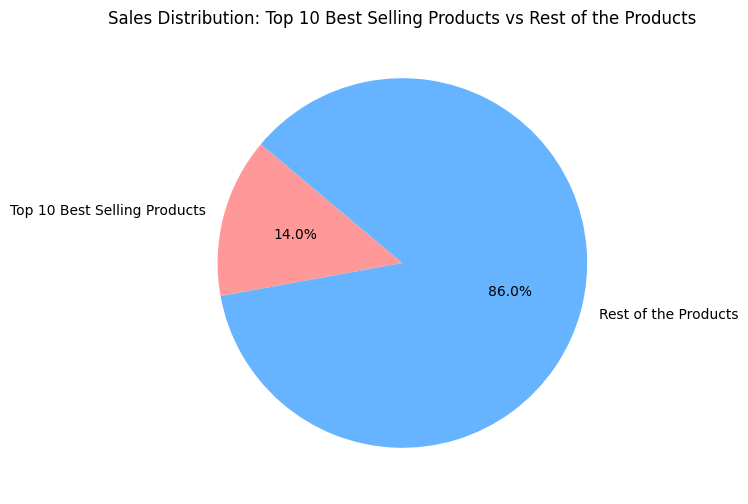

In [ ]:
top_10_total_ratings = top_selling_products['rating_count'].sum()
total_ratings_all_products = df['rating_count'].sum()
ratings_rest_of_products = total_ratings_all_products - top_10_total_ratings
pie_data = [top_10_total_ratings, ratings_rest_of_products]
labels = ['Top 10 Best Selling Products', 'Rest of the Products']

# Creating the pie chart
plt.figure(figsize=(10, 6))
plt.pie(pie_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Sales Distribution: Top 10 Best Selling Products vs Rest of the Products')
plt.show()

##### **Scatter distribution between Actual price, rating and discounted price**

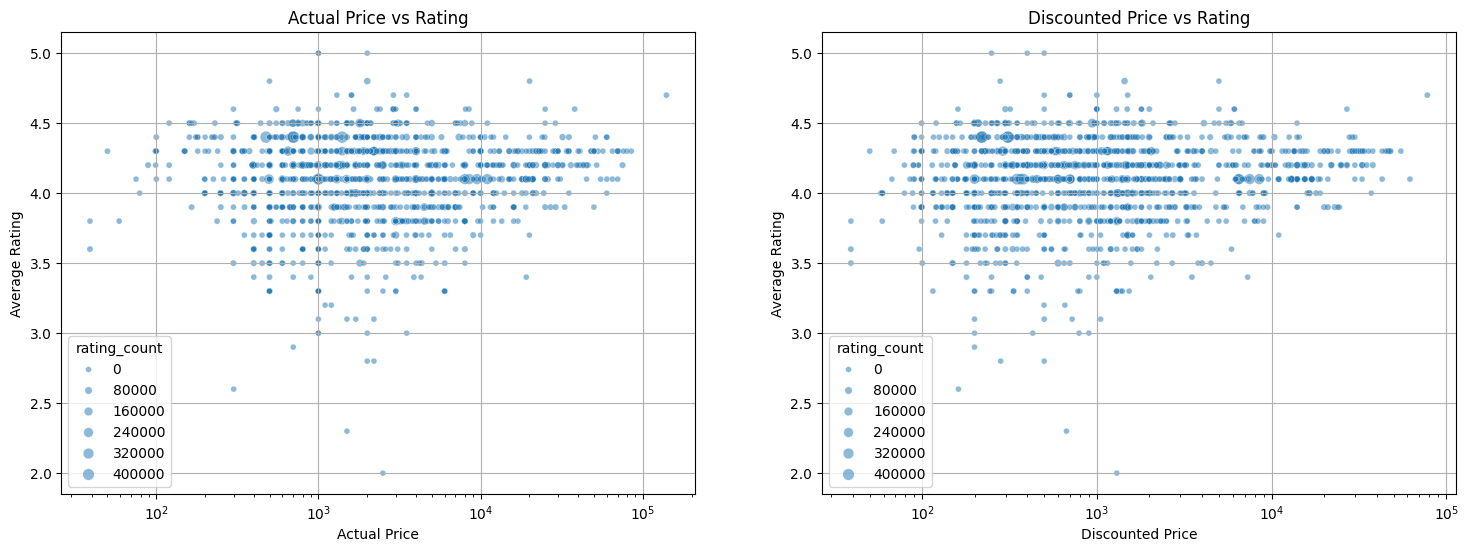

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

#Scatter plot for actual price vs rating
sns.scatterplot(ax=axes[0], data=df, x='actual_price', y='rating', size='rating_count', alpha=0.5)
axes[0].set_title('Actual Price vs Rating')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Average Rating')
axes[0].set_xscale('log')
axes[0].grid(True)

#Scatter plot for discounted price vs rating
sns.scatterplot(ax=axes[1], data=df, x='discounted_price', y='rating', size='rating_count', alpha=0.5)
axes[1].set_title('Discounted Price vs Rating')
axes[1].set_xlabel('Discounted Price')
axes[1].set_ylabel('Average Rating')
axes[1].set_xscale('log')
axes[1].grid(True)

plt.show()

**Insights:**

* **Actual Price vs Rating:** There is a wide distribution of ratings across different price ranges. Higher-priced products tend to receive a moderate to high number of ratings, suggesting that consumers are engaged with products across all price ranges.

* **Discounted Price vs Rating:** Similar to the actual price, the discounted price also shows a broad distribution of ratings. It indicates that discounted prices do not significantly bias the average ratings, suggesting that consumers are rating based on product quality and satisfaction rather than just price.

For a recommendation system, these insights suggest that both high and low-priced products can be equally popular, and discounts do not necessarily lead to higher ratings.

#### **Top categories based on the number of products**

In [ ]:
categories = df['category'].str.split('|').explode()
category_counts = Counter(categories)
category_df = pd.DataFrame(category_counts.items(), columns=['Category', 'Count']).sort_values(by='Count', ascending=False)

#Display the top categories
top_categories = category_df.head(10)
top_categories.reset_index(drop=True, inplace=True)
top_categories

,Category,Count
0,computersaccessoriesaccessoriesperipheralscablesaccessor...,233
1,electronicswearabletechnologysmartwatches,76
2,electronicsmobilesaccessoriessmartphonesbasicmobilessmar...,68
3,electronicshometheatertvvideotelevisionssmarttelevisions,63
4,electronicsheadphonesearbudsaccessoriesheadphonesinear,52
5,electronicshometheatertvvideoaccessoriesremotecontrols,49
6,homekitchenkitchenhomeappliancessmallkitchenappliancesmi...,27
7,electronicshometheatertvvideoaccessoriescableshdmicables,24
8,homekitchenkitchenhomeappliancesvacuumcleaningironingiro...,24
9,computersaccessoriesaccessoriesperipheralskeyboardsmicei...,24


# **Sentiment Analysis**

Sentiment Analysis (opinion mining) is a field of Natural Language Processing (NLP) that focuses on identifying and categorizing opinions or sentiments based on texts. The primary objective is to determine the writer's or speaker's attitude towards a particular topic, product, service, or overall context. This attitude or sentiment is usually classified into categories such as positive, negative, or neutral.

In [ ]:
#Classify sentiment
def sentiment_analysis(text):
    analysis = TextBlob(text)
    #threshold for positive and negative sentiments
    if analysis.sentiment.polarity > 0.1:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'



In [ ]:
#Applying sentiment analysis to the review content
reviews = df['review_content']
reviews_sentiments = reviews.apply(sentiment_analysis)



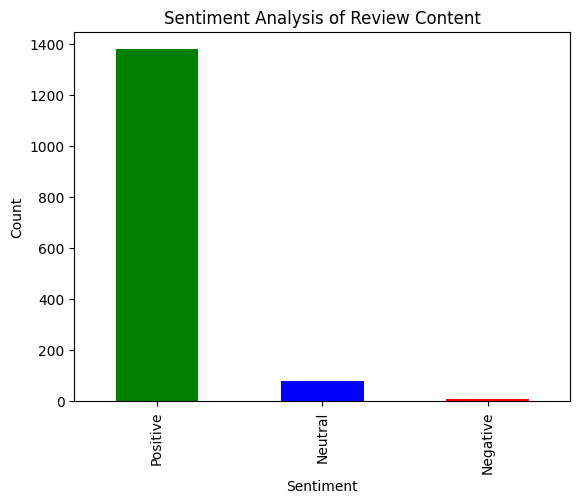

In [ ]:
# Counting the occurrences of each sentiment
sentiment_counts = reviews_sentiments.value_counts()

sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'], title='Sentiment Analysis of Review Content')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
# Adding the sentiment labels back to the reviews
df['Sentiment'] = reviews_sentiments

# Finding examples of positive, neutral, and negative sentiments
positive_example = df[df['Sentiment'] == 'Positive'].iloc[0]['review_content']
neutral_example = df[df['Sentiment'] == 'Neutral'].iloc[0]['review_content']
negative_example = df[df['Sentiment'] == 'Negative'].iloc[0]['review_content']

print("Sentiment review labels: ")
example_reviews = pd.DataFrame({
    "Sentiment": ["Positive", "Neutral", "Negative"],
    "Review": [positive_example, neutral_example, negative_example]
})
example_reviews

Sentiment review labels: 


,Sentiment,Review
0,Positive,looks durable charging fine toono complainscharging real...
1,Neutral,overall goodtv picture ok smart bettersound low another ...
2,Negative,value moneyusually gdgood productgoodquality poor respon...


# **Feature Engineering**

In [ ]:
#Drop irelevant columns
drop_col = ['discounted_price', 'actual_price', 'discount_percentage', 'review_id', 'review_title',
                   'user_name', 'img_link', 'product_link']
df = df.drop(columns=drop_col)

**Applying TF-IDF (Term Frequency and Inverse Document Frequency**

The main goal is to evaluate the importance of a word to a document. Usually, it consists of:

* **Term Frequency (TF):** measures how frequently a term occurs in a document. It's calculated by dividing the number of times a term appears in a document by the total number of terms in that document.
* **Inverse Document Frequency (IDF):** measures the importance of the term across the corpus. It's calculated by taking the logarithm of the total number of documents divided by the number of documents containing the term.

To effectively applying TF-IDF to this dataset, let consider mergin text from product_name, category, about_product to form a comprehensive representation of each product.

In [ ]:
df['combined_text'] = df['product_name'] + ' ' + df['category'] + ' ' + df['about_product'] +' '+ df['review_content']
#Fill null with empty string to avoid issues
df['combined_text'] = df['combined_text'].fillna('')

#Instantiate TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2, ngram_range=(1, 1))

#Fit and transform
tfidf_matrix = vectorizer.fit_transform(df['combined_text'])

In [ ]:
#Label-Encoding the Sentiment columns

label_encoder = LabelEncoder()

# Fitting the encoder and transforming the 'Sentiment' column
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])


# **Content-Based Approach**

In [ ]:
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Check the shape of the cosine similarity matrix
cosine_sim.shape


(1465, 1465)

Now, let's write a function that takes a product ID as input and outputs a list of recommended products based on this hybrid approach. The function will first find similar products based on content, then consider the collaborative filtering aspect, and finally combine these recommendations.

Since we don't have individual user-product ratings, we'll use overall product ratings for collaborative-filtering.

In [ ]:
# Create a product-user matrix with overall product ratings
product_user_matrix = df.pivot_table(index='product_id', values='rating', aggfunc='mean')

#Fill missing values with the average rating
product_user_matrix = product_user_matrix.fillna(product_user_matrix.mean())

#Display the product-user matrix
product_user_matrix.head()

,rating
product_id,
B002PD61Y4,4.1
B002SZEOLG,4.2
B003B00484,4.3
B003L62T7W,4.3
B004IO5BMQ,4.5


# **Hybrid Recommendation System**

#### **Define a function to build a hybrid-recommendation system**

* In the below function, we will build a hybrid recommendation system by integrating content-based and collaborative filtering approaches.
* First, for a given product ID, we will identify similar products using content-based filtering, which leverages a TF-IDF vectorization of product features to compute cosine similarity scores with other products. This part of the system identifies products with similar content features.
* Then, it incorporates collaborative filtering by examining the ratings of the target product and finding other products with similar ratings, assuming that products with similar ratings might appeal to similar user preferences.
* These two sets of recommendations (content-based and collaborative) are then combined, creating a diverse set of recommendations that consider both the products' content characteristics and user rating patterns.
* The final output is a list of top recommended products based on this hybrid method.

In [ ]:
# Function to handle recommendations and display results
def hybrid_recommendation(search_term, content_sim_matrix, product_user_matrix, products, top_n=10):
    # Search for the product based on the search term in product name, category, or about product
    search_results = products[
        products['product_name'].str.contains(search_term, case=False) |
        products['category'].str.contains(search_term, case=False) |
        products['about_product'].str.contains(search_term, case=False)
    ]

    # If no matching products are found, return a message
    if search_results.empty:
        return f"No products found for search term: {search_term}"

    # Choose the first matching product for recommendations
    sample_product_id = search_results.iloc[0]['product_id']
    sample_product_name = search_results.iloc[0]['product_name']

    # Get the index of the product that matches the product_id
    idx = products.index[products['product_id'] == sample_product_id][0]

    # Content-based filtering: Get pairwise similarity scores
    sim_scores = list(enumerate(content_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    content_recommendations_idx = [i[0] for i in sim_scores[1:top_n+1]]

    # Collaborative Filtering: Find products with similar ratings
    if sample_product_id in product_user_matrix.index:
        current_product_rating = product_user_matrix.loc[sample_product_id].values[0]
        similar_rating_products = product_user_matrix.iloc[(product_user_matrix['rating'] - current_product_rating).abs().argsort()[:top_n]]
        collaborative_recommendations_idx = similar_rating_products.index
        collaborative_recommendations_idx = [products.index[products['product_id'] == pid].tolist()[0] for pid in collaborative_recommendations_idx]
    else:
        collaborative_recommendations_idx = []

    # Combine content-based and collaborative filtering recommendations
    combined_indices = list(set(content_recommendations_idx + collaborative_recommendations_idx))
    recommended_products = products.iloc[combined_indices].copy()
    recommended_products = recommended_products[['product_id', 'product_name', 'category', 'rating']]

    return sample_product_name, recommended_products


# Example usage: Search for any term (name or category)
## search_term = "smart tv"  # Example search term (can be part of name or category)

# Get the recommendations
## sample_product_name, recommended_products = hybrid_recommendation(search_term, cosine_sim, product_user_matrix, df)

# Print the results
## print(f"Recommendations for search term '{search_term}':")
## print(f"Sample product used for recommendation: {sample_product_name}")
## print(recommended_products.head(10))

# Visualize the recommendations
## visualize_recommendations(recommended_products)

# **Evaluating the model**

* Now, let test our recommendation system with a user who purchased product_id 0.

In [ ]:
# Visualize recommendations
def visualize_recommendations(recommended_products):
    # Check if recommendations is a string (product not found)
    if isinstance(recommended_products, str):
        print(recommended_products) # Print the message if product not found
        return # Exit the function

    plt.figure(figsize=(14, 12))
    sns.barplot(x='rating', y='product_name', data=recommended_products, palette='Blues_d')
    plt.title('Recommended Products and Their Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Product Name')
    plt.show()


In [ ]:
# Create an output widget to display the results
output_area = widgets.Output()

In [ ]:
# Function to handle user input and display recommendations in the output area
def on_button_click(b):
    search_term = search_box.value  # Get the value from the input box
    with output_area:
        output_area.clear_output()  # Clear previous output
        sample_product_name, recommended_products = hybrid_recommendation(search_term, cosine_sim, product_user_matrix, df)

        # Display the recommendations in the output area
        print(f"\nRecommendations for search term '{search_term}':")
        print(f"Sample product used for recommendation: {sample_product_name}")
        display(recommended_products.head(10))

        # Visualize the recommendations
        visualize_recommendations(recommended_products)

In [ ]:
# Create a text input widget
search_box = widgets.Text(
    value='',
    placeholder='Enter product name, category, or description',
    description='Search:',
    disabled=False
)


In [ ]:
# Create a button to trigger the search
search_button = widgets.Button(
    description='Get Recommendations',
    disabled=False,
    button_style='success',
    tooltip='Click to search and get recommendations',
    icon='search'
)

# Link the button click event to the function
search_button.on_click(on_button_click)

# Display the text box, button, and output area
display(search_box, search_button, output_area)

In [ ]:
# Create a button to trigger the search
search_button = widgets.Button(
    description='Get Recommendations',
    disabled=False,
    button_style='success',
    tooltip='Click to search and get recommendations',
    icon='search'
)

# Link the button click event to the function
search_button.on_click(on_button_click)

# Set the height for the output area
output_area.layout.height = '400px'  # Adjust this value as needed

# Display the text box, button, and output area
display(search_box, search_button, output_area)



Text(value='laptop', description='Search:', placeholder='Enter product name, category, or description')

Button(button_style='success', description='Get Recommendations', icon='search', style=ButtonStyle(), tooltip=…

Output(layout=Layout(height='400px'))